<a href="https://colab.research.google.com/github/rk639-hue/ORIE4580/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: Rishi Kumar (rk639) and Darcy Del Real(dld226)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

References: LLMs used for Code and Latex formatting

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
import numpy as np

# Part (a) -------------------

np.random.seed(42)

n_passengers = 10000
interval = 1000
train_period = 10

# Generate and sort passenger arrivals
arrivals = np.sort(np.random.uniform(0, interval, n_passengers))

# Compute wait times until next train
next_train = np.ceil(arrivals / train_period) * train_period
waits = next_train - arrivals

# Mean wait time
mean_wait = waits.mean()

# 95% confidence interval
sd_wait = waits.std(ddof=1)
se_wait = sd_wait / np.sqrt(n_passengers)
ci_lower = mean_wait - 1.96 * se_wait
ci_upper = mean_wait + 1.96 * se_wait

print(f"Expected wait time (minutes): {mean_wait:.4f}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")



Expected wait time (minutes): 5.0174
95% CI: (4.9608, 5.0741)


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [ ]:
import numpy as np

# Part (b) -------------------

np.random.seed(42)

n_passengers = 10000
interval = 1000
mean_interarrival = 10

# Use the same passenger arrivals from part (a)
arrivals = np.sort(np.random.uniform(0, interval, n_passengers))

# Generate train arrival times: exponential inter-arrivals
train_times = []
t = 0.0
while t < interval + 50:  # extra margin so last passengers can catch a train
    t += np.random.exponential(mean_interarrival)
    train_times.append(t)
train_times = np.array(train_times)

# For each passenger, find the next train after arrival
waits = np.empty(n_passengers)
j = 0
for i, a in enumerate(arrivals):
    while train_times[j] < a:
        j += 1
    waits[i] = train_times[j] - a

# Mean wait + CI
mean_wait = waits.mean()
sd_wait = waits.std(ddof=1)
se_wait = sd_wait / np.sqrt(n_passengers)
ci_lower = mean_wait - 1.96 * se_wait
ci_upper = mean_wait + 1.96 * se_wait

print(f"Expected wait time (minutes): {mean_wait:.4f}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")


Expected wait time (minutes): 9.6725
95% CI: (9.5004, 9.8446)


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [ ]:
import numpy as np

# Part (c) -------------------

# Compute inter-arrival times between trains
inter_arrivals = np.diff(train_times)

# Restrict to trains within the interval (optional but cleaner)
inter_arrivals = inter_arrivals[train_times[1:] <= interval]

# Sample mean and CI
mean_interarrival = inter_arrivals.mean()
sd_interarrival = inter_arrivals.std(ddof=1)
se_interarrival = sd_interarrival / np.sqrt(len(inter_arrivals))
ci_lower = mean_interarrival - 1.96 * se_interarrival
ci_upper = mean_interarrival + 1.96 * se_interarrival

print(f"Estimated mean inter-arrival (minutes): {mean_interarrival:.4f}")
print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")
print(f"Number of trains observed: {len(inter_arrivals)}")


Estimated mean inter-arrival (minutes): 10.3400
95% CI: (8.3867, 12.2934)
Number of trains observed: 96


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [3]:


# Part (d) -------------------
import numpy as np

np.random.seed(42)
n_passengers = 10000
interval = 1000
train_period = 10
mean_interarrival = 10

print("\n--- Part (d) ---")

# For part (a) - Deterministic trains
print("\nPart (a) - Deterministic:")
# Generate passenger arrivals and compute waits for part (a)
arrivals_a = np.sort(np.random.uniform(0, interval, n_passengers))
next_train_a = np.ceil(arrivals_a / train_period) * train_period
waits_a = next_train_a - arrivals_a
mean_wait_a = waits_a.mean()

# In deterministic case, every passenger experiences the same 10-minute interval
experienced_intervals_a = np.full(n_passengers, 10.0)
mean_interval_a = experienced_intervals_a.mean()
sd_interval_a = experienced_intervals_a.std(ddof=1)
se_interval_a = sd_interval_a / np.sqrt(n_passengers)
ci_lower_a = mean_interval_a - 1.96 * se_interval_a
ci_upper_a = mean_interval_a + 1.96 * se_interval_a

print(f"Average experienced inter-arrival: {mean_interval_a:.4f}")
print(f"95% CI: ({ci_lower_a:.4f}, {ci_upper_a:.4f})")

# For part (b) - Exponential trains
print("\nPart (b) - Exponential:")
# Generate train arrival times
train_times = []
t = 0.0
while t < interval + 50:
    t += np.random.exponential(mean_interarrival)
    train_times.append(t)
train_times = np.array(train_times)

# Use same passenger arrivals as part (a) for consistency
arrivals_b = arrivals_a.copy()

# Compute waits for part (b)
waits_b = np.empty(n_passengers)
j = 0
for i, a in enumerate(arrivals_b):
    while train_times[j] < a:
        j += 1
    waits_b[i] = train_times[j] - a
mean_wait_b = waits_b.mean()

# For each passenger, find the interval they experience
experienced_intervals_b = np.empty(n_passengers)
j = 0
for i, a in enumerate(arrivals_b):
    while train_times[j] < a:
        j += 1
    # The interval this passenger experiences is between current train and previous train
    if j == 0:
        experienced_intervals_b[i] = train_times[0]  # First train
    else:
        experienced_intervals_b[i] = train_times[j] - train_times[j-1]

mean_interval_b = experienced_intervals_b.mean()
sd_interval_b = experienced_intervals_b.std(ddof=1)
se_interval_b = sd_interval_b / np.sqrt(n_passengers)
ci_lower_b = mean_interval_b - 1.96 * se_interval_b
ci_upper_b = mean_interval_b + 1.96 * se_interval_b

print(f"Average experienced inter-arrival: {mean_interval_b:.4f}")
print(f"95% CI: ({ci_lower_b:.4f}, {ci_upper_b:.4f})")

# Relationship to waiting times
print(f"\nRelationship to waiting times:")
print(f"Part (a): Avg experienced interval = {mean_interval_a:.2f}, Avg wait = {mean_wait_a:.2f}")
print(f"Part (b): Avg experienced interval = {mean_interval_b:.2f}, Avg wait = {mean_wait_b:.2f}")
print(f"In both cases: Average wait ≈ 0.5 × Average experienced interval")
print(f"Part (a) ratio: {mean_wait_a/mean_interval_a:.3f}")
print(f"Part (b) ratio: {mean_wait_b/mean_interval_b:.3f}")


--- Part (d) ---

Part (a) - Deterministic:
Average experienced inter-arrival: 10.0000
95% CI: (10.0000, 10.0000)

Part (b) - Exponential:
Average experienced inter-arrival: 19.3454
95% CI: (19.1181, 19.5727)

Relationship to waiting times:
Part (a): Avg experienced interval = 10.00, Avg wait = 5.02
Part (b): Avg experienced interval = 19.35, Avg wait = 9.67
In both cases: Average wait ≈ 0.5 × Average experienced interval
Part (a) ratio: 0.502
Part (b) ratio: 0.500


In [5]:
# Explanation
print(f"\nExplanation:")
print(f"This demonstrates the INSPECTION PARADOX (or waiting time paradox):")
print(f"- In both cases, trains actually arrive every 10 minutes on average")
print(f"- But in the exponential case, passengers EXPERIENCE longer intervals (19.35 min)")
print(f"- Reason: Passengers are more likely to arrive during LONGER gaps between trains")
print(f"- Short gaps have fewer passengers, long gaps have more passengers")
print(f"- Therefore, the average gap EXPERIENCED BY PASSENGERS is longer than the true average")
print(f"- Since waiting time ≈ ½ × experienced interval, this explains why:")
print(f"  • Deterministic: wait = ½ × 10 = 5 minutes")
print(f"  • Exponential: wait = ½ × 19.35 ≈ 9.67 minutes")



Explanation:
This demonstrates the INSPECTION PARADOX (or waiting time paradox):
- In both cases, trains actually arrive every 10 minutes on average
- But in the exponential case, passengers EXPERIENCE longer intervals (19.35 min)
- Reason: Passengers are more likely to arrive during LONGER gaps between trains
- Short gaps have fewer passengers, long gaps have more passengers
- Therefore, the average gap EXPERIENCED BY PASSENGERS is longer than the true average
- Since waiting time ≈ ½ × experienced interval, this explains why:
  • Deterministic: wait = ½ × 10 = 5 minutes
  • Exponential: wait = ½ × 19.35 ≈ 9.67 minutes


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-769659847.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Uniform samples in region $\mathcal{S}$")


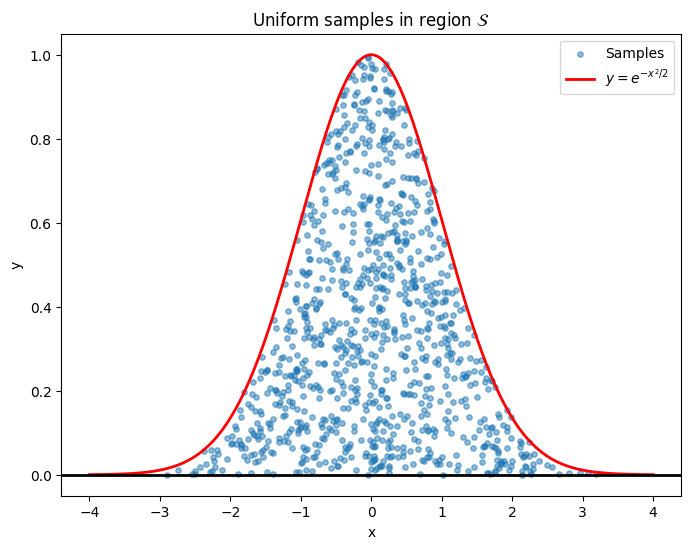

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
n = 1000

X = np.random.randn(n)
Y = np.random.rand(n) * np.exp(-X**2 / 2)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.5, s=15, label="Samples")

# Overlay the boundary curves
x_vals = np.linspace(-4, 4, 400)
plt.plot(x_vals, np.exp(-x_vals**2 / 2), 'r-', lw=2, label=r"$y=e^{-x^2/2}$")
plt.axhline(0, color='black', lw=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples in region $\mathcal{S}$")
plt.legend()
plt.show()


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

/tmp/ipython-input-262347488.py:14: RuntimeWarning: divide by zero encountered in divide
  return np.minimum(1/np.abs(np.cos(theta)), 1/np.abs(np.sin(theta)))
/tmp/ipython-input-262347488.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm_constant = np.trapz(unnorm, theta_grid)


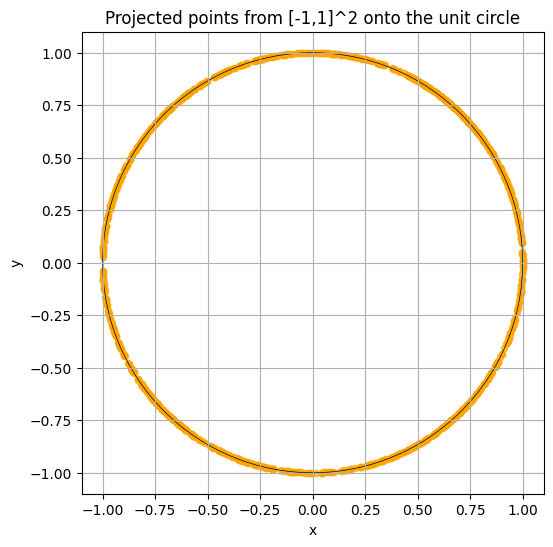

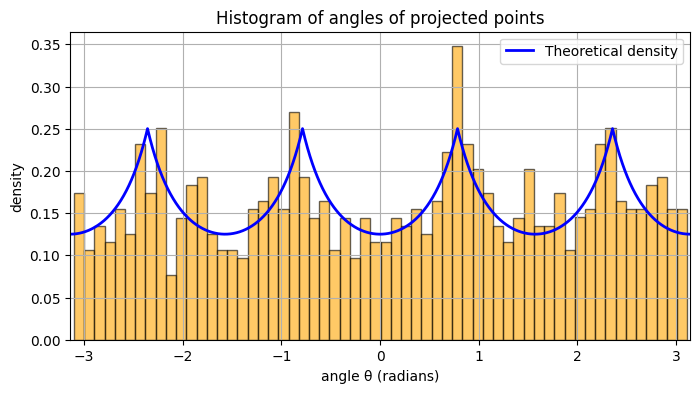

Fraction of points in small sectors around ±45° and ±135°:
 sector [-0.89, -0.69]: 0.0460
 sector [0.69, 0.89]: 0.0640
 sector [2.26, 2.46]: 0.0440
 sector [-2.46, -2.26]: 0.0440
Projecting uniform pointsonto the unit circle does not produce a uniform angular distribution.


In [ ]:
np.random.seed(1)
n = 1000

U = np.random.uniform(-1, 1, size=n)
V = np.random.uniform(-1, 1, size=n)
R = np.sqrt(U**2 + V**2)
X = U / R
Y = V / R
theta = np.arctan2(Y, X)

# Theoretical angular density
def r_max(theta):
    """Maximum radius until hitting the square [-1,1]^2 along angle theta."""
    return np.minimum(1/np.abs(np.cos(theta)), 1/np.abs(np.sin(theta)))

theta_grid = np.linspace(-np.pi, np.pi, 2000, endpoint=False)
rmax_grid = r_max(theta_grid)
unnorm = rmax_grid**2
norm_constant = np.trapz(unnorm, theta_grid)
f_theta = unnorm / norm_constant   # normalized angular density


# PLOTS

# Projected points on the unit circle
plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=20, alpha=0.7, color='orange')
circle = plt.Circle((0,0), 1, fill=False, linewidth=0.5, color='black')
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal', 'box')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title('Projected points from [-1,1]^2 onto the unit circle')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Histogram of angles with theoretical density
plt.figure(figsize=(8,4))
bins = 60
plt.hist(theta, bins=bins, density=True, alpha=0.6, color='orange', edgecolor='black')
plt.plot(theta_grid, f_theta, linewidth=2, color='blue', label='Theoretical density')
plt.xlim(-np.pi, np.pi)
plt.xlabel('angle θ (radians)')
plt.ylabel('density')
plt.title('Histogram of angles of projected points')
plt.legend()
plt.grid(True)
plt.show()

# check
sectors = [(-np.pi/4 - 0.1, -np.pi/4 + 0.1),
           (np.pi/4 - 0.1,  np.pi/4 + 0.1),
           (3*np.pi/4 - 0.1, 3*np.pi/4 + 0.1),
           (-3*np.pi/4 - 0.1, -3*np.pi/4 + 0.1)]

print("Fraction of points in small sectors around ±45° and ±135°:")
for a,b in sectors:
    frac = np.mean((theta >= a) & (theta < b))
    print(f" sector [{a:.2f}, {b:.2f}]: {frac:.4f}")


print("Projecting uniform pointsonto the unit circle does not produce a uniform angular distribution.")

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

/tmp/ipython-input-577147166.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.trapz(r2, theta)


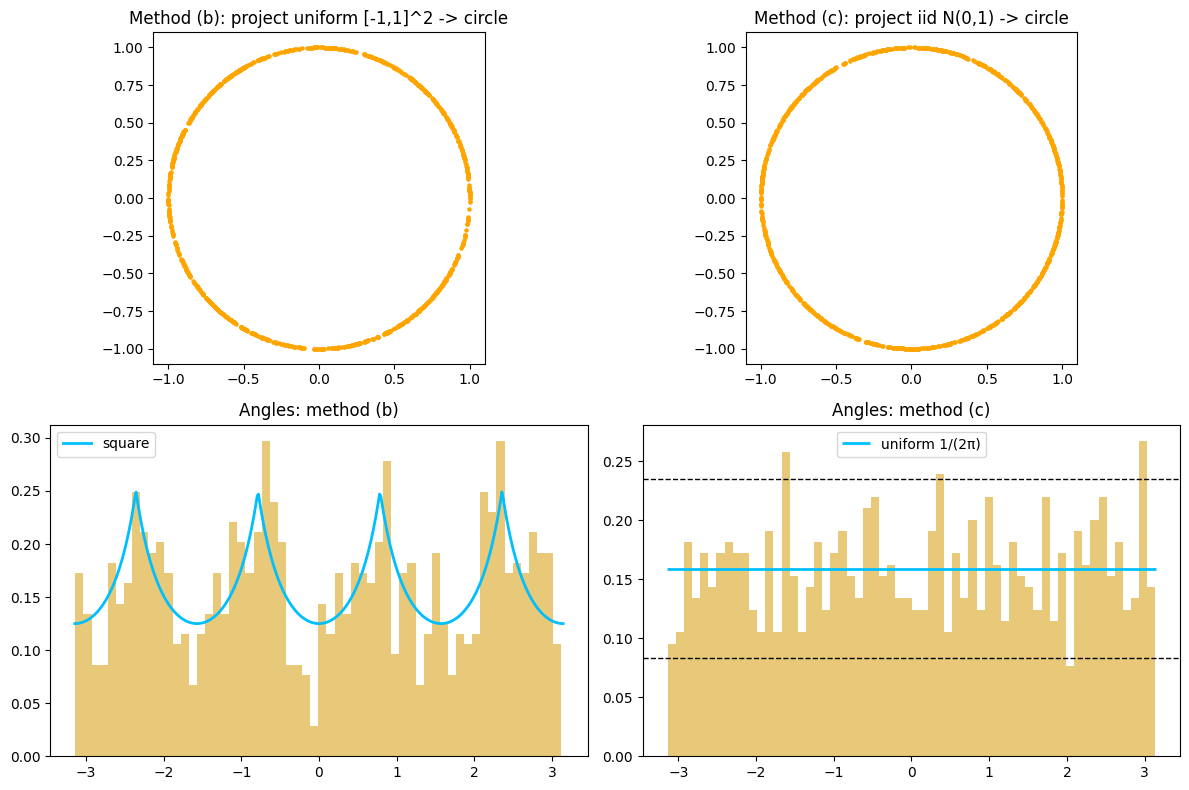

Projecting isotropic Gaussian vectors to the unit circle yields a uniform angular distribution,
while projecting uniform points from the square yields a non-uniform distribution, with peaks near the diagonals.
The difference lies in that the Why Method (b) is differentthe uniform distribution on the square is not rotationally
symmetric — the square has corners and flat sides. So when we project those points outward to the circle, some directions 
(like diagonals, where the square stretches farther) get more points. However c is rotationally symetric.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Theoretical angular density - from above
def r_max(theta):
    """Maximum radius until hitting the square [-1,1]^2 along angle theta."""
    return np.minimum(1/np.abs(np.cos(theta)), 1/np.abs(np.sin(theta)))

def square_angle_density(theta, num_points=2000):
    r2 = r_max(theta)**2
    norm = np.trapz(r2, theta)
    return r2 / norm


# Method in part b: uniform in square -> project to circle
n = 1000
U = np.random.uniform(-1,1,n)
V = np.random.uniform(-1,1,n)
norms_b = np.sqrt(U**2 + V**2)
Xb, Yb = U/norms_b, V/norms_b
angles_b = np.arctan2(Yb, Xb)


# iid Gaussian -> project to circle
Z = np.random.normal(0,1,n)
W = np.random.normal(0,1,n)
norms_c = np.sqrt(Z**2 + W**2)
Xc, Yc = Z/norms_c, W/norms_c
angles_c = np.arctan2(Yc, Xc)

# Plots
fig, axes = plt.subplots(2,2, figsize=(12,8))

axes[0,0].scatter(Xb, Yb, s=5, color="orange")
axes[0,0].set_title("Method (b): project uniform [-1,1]^2 -> circle")
axes[0,0].set_aspect("equal")

axes[0,1].scatter(Xc, Yc, s=5, color="orange")
axes[0,1].set_title("Method (c): project iid N(0,1) -> circle")
axes[0,1].set_aspect("equal")

theta_grid = np.linspace(-np.pi, np.pi, 400)
theory_b = square_angle_density(theta_grid)

axes[1,0].hist(angles_b, bins=60, density=True, alpha=0.6, color="goldenrod")
axes[1,0].plot(theta_grid, theory_b, "deepskyblue", lw=2, label="square")
axes[1,0].set_title("Angles: method (b)")
axes[1,0].legend()

# Histogram for method (c)
counts, edges, _ = axes[1,1].hist(angles_c, bins=60, density=True, alpha=0.6, color="goldenrod")
axes[1,1].hlines(1/(2*np.pi), -np.pi, np.pi, colors="deepskyblue", lw=2, label="uniform 1/(2π)")

# Test 95% confidence interval
bins = 60
p = 1/bins
bin_width = 2*np.pi/bins
sigma_height = np.sqrt(p*(1-p)/n) / bin_width
f_uniform = 1/(2*np.pi)
lower = f_uniform - 1.96*sigma_height
upper = f_uniform + 1.96*sigma_height
axes[1,1].axhline(lower, color="k", linestyle="--", lw=1)
axes[1,1].axhline(upper, color="k", linestyle="--", lw=1)

axes[1,1].set_title("Angles: method (c)")
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("Projecting isotropic Gaussian vectors to the unit circle yields a uniform angular distribution,")
print("while projecting uniform points from the square yields a non-uniform distribution, with peaks near the diagonals." )
print("The difference lies in that the Why Method (b) is differentthe uniform distribution on the square is not rotationally" )
print("symmetric — the square has corners and flat sides. So when we project those points outward to the circle, some directions ")
print("(like diagonals, where the square stretches farther) get more points. However c is rotationally symetric.")


<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
## Solution

We are given:

- **Means**:  
  $$
  \mu = \begin{bmatrix} 0.14 \\ 0.07 \\ 0.16 \end{bmatrix}
  $$
- **Variances**:  
  $$
  \sigma_1^2 = 0.0625,\quad \sigma_2^2 = 0.01,\quad \sigma_3^2 = 0.09
  $$
- **Independence** between returns.

We want:
$$
P(\text{U.S. stocks} > 0 \ \cap \ \text{U.S. bonds} > 0 \ \cap \ \text{EM bonds} > 0)
$$

---

### Step 1: Standard deviations

$$
\sigma_1 = \sqrt{0.0625} = 0.25
$$
$$
\sigma_2 = \sqrt{0.01} = 0.10
$$
$$
\sigma_3 = \sqrt{0.09} = 0.30
$$

---

### Step 2: Normal probability for each

For a normally distributed return $R_i \sim N(\mu_i, \sigma_i^2)$:

$$
P(R_i > 0) = P\left( Z > \frac{0 - \mu_i}{\sigma_i} \right) = \Phi\left( \frac{\mu_i}{\sigma_i} \right)
$$

- **U.S. stocks**:
$$
\frac{\mu_1}{\sigma_1} = \frac{0.14}{0.25} = 0.56
$$
$$
P_1 = \Phi(0.56) \approx 0.7123
$$

- **U.S. bonds**:
$$
\frac{\mu_2}{\sigma_2} = \frac{0.07}{0.10} = 0.7
$$
$$
P_2 = \Phi(0.7) \approx 0.7580
$$

- **EM bonds**:
$$
\frac{\mu_3}{\sigma_3} = \frac{0.16}{0.30} \approx 0.5333
$$
$$
P_3 = \Phi(0.5333) \approx 0.7031
$$

---

### Step 3: Joint probability (independence)

$$
P(\text{all} > 0) = P_1 \cdot P_2 \cdot P_3
$$
$$
\approx 0.7123 \times 0.7580 \times 0.7031
$$

First:
$$
0.7123 \times 0.7580 \approx 0.5399
$$
Then:
$$
0.5399 \times 0.7031 \approx 0.3796
$$

---

### Final Answer

$$
\boxed{0.38}
$$


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Given parameters
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01, 0.0375],
    [-0.01, 0.01, -0.015],
    [0.0375, -0.015, 0.09]
])

# Cholesky decomposition (lower triangular)
L = cholesky(Sigma, lower=True)

# Simulation parameters
np.random.seed(42)  # for reproducibility
n_sim = 1000000

# Generate independent standard normals
Z = np.random.normal(0, 1, (3, n_sim))

# Transform to correlated normals: X = μ + LZ
X = mu.reshape(-1, 1) + L @ Z

# Check if all returns > 0
all_positive = np.all(X > 0, axis=0)

# Probability estimate
prob = np.mean(all_positive)

# Confidence interval (95%)
se = np.sqrt(prob * (1 - prob) / n_sim)
ci_lower = prob - 1.96 * se
ci_upper = prob + 1.96 * se

print(f"Estimated probability: {prob:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

Estimated probability: 0.3696
95% Confidence Interval: (0.3687, 0.3706)


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.
## Gaussian Copula Preliminaries: Finding α and β

We want to find parameters $\alpha$ and $\beta$ such that a uniform distribution on $[\alpha, \beta]$ has:

- Mean $\mathbb{E}[V] = 0$
- Variance $\text{Var}(V) = 1$

---

### Step 1: Mean and variance formulas

For $V \sim \text{Uniform}[\alpha, \beta]$:

- Mean: $\mathbb{E}[V] = \frac{\alpha + \beta}{2}$
- Variance: $\text{Var}(V) = \frac{(\beta - \alpha)^2}{12}$

---

### Step 2: Setting up equations

From the given conditions:

1. $\frac{\alpha + \beta}{2} = 0$
2. $\frac{(\beta - \alpha)^2}{12} = 1$

---

### Step 3: Solving the system

From equation (1): $\alpha + \beta = 0 \Rightarrow \beta = -\alpha$

Substitute into equation (2):
$$
\frac{(\beta - \alpha)^2}{12} = \frac{(-\alpha - \alpha)^2}{12} = \frac{(-2\alpha)^2}{12} = \frac{4\alpha^2}{12} = 1
$$

Simplify:
$$
\frac{\alpha^2}{3} = 1 \Rightarrow \alpha^2 = 3 \Rightarrow \alpha = \pm \sqrt{3}
$$

---

### Step 4: Choosing the interval

We have two solutions:

- **Option 1**: $\alpha = -\sqrt{3}$, $\beta = \sqrt{3}$ → Interval $[-\sqrt{3}, \sqrt{3}]$
- **Option 2**: $\alpha = \sqrt{3}$, $\beta = -\sqrt{3}$ → This would be invalid since $\alpha < \beta$ is required

Therefore, the valid solution is:
$$
\alpha = -\sqrt{3}, \quad \beta = \sqrt{3}
$$

---

### Step 5: Verification

- Mean: $\frac{-\sqrt{3} + \sqrt{3}}{2} = 0$ ✓
- Variance: $\frac{(\sqrt{3} - (-\sqrt{3}))^2}{12} = \frac{(2\sqrt{3})^2}{12} = \frac{12}{12} = 1$ ✓

---

### Final Answer

$$
\boxed{\alpha = -\sqrt{3}, \quad \beta = \sqrt{3}}
$$

The uniform distribution on $[-\sqrt{3}, \sqrt{3}]$ has mean 0 and variance 1.

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.
## Finding 𝔼[V₂] and Var(V₂)

We have:
- $X_1, X_2 \sim \text{Uniform}[\alpha, \beta]$ i.i.d. with $\alpha = -\sqrt{3}$, $\beta = \sqrt{3}$
- $B \sim \text{Bernoulli}(p)$, independent of $X_1, X_2$
- $V_1 = X_1$
- $V_2 = (1-B)X_1 + BX_2 = \begin{cases} X_1 & \text{if } B = 0 \\ X_2 & \text{if } B = 1 \end{cases}$

---

### Step 1: Expectation of V₂

Using the law of total expectation:
$$
\mathbb{E}[V_2] = \mathbb{E}[\mathbb{E}[V_2 | B]]
$$

Conditional on $B$:
- If $B = 0$: $\mathbb{E}[V_2 | B=0] = \mathbb{E}[X_1] = 0$
- If $B = 1$: $\mathbb{E}[V_2 | B=1] = \mathbb{E}[X_2] = 0$

Therefore:
$$
\mathbb{E}[V_2] = (1-p)\cdot 0 + p\cdot 0 = 0
$$

---

### Step 2: Variance of V₂

Using the law of total variance:
$$
\text{Var}(V_2) = \mathbb{E}[\text{Var}(V_2 | B)] + \text{Var}(\mathbb{E}[V_2 | B])
$$

First term: $\mathbb{E}[\text{Var}(V_2 | B)]$
- If $B = 0$: $\text{Var}(V_2 | B=0) = \text{Var}(X_1) = 1$
- If $B = 1$: $\text{Var}(V_2 | B=1) = \text{Var}(X_2) = 1$

So $\mathbb{E}[\text{Var}(V_2 | B)] = (1-p)\cdot 1 + p\cdot 1 = 1$

Second term: $\text{Var}(\mathbb{E}[V_2 | B])$
- $\mathbb{E}[V_2 | B=0] = 0$
- $\mathbb{E}[V_2 | B=1] = 0$
- So $\mathbb{E}[V_2 | B]$ is constant 0, hence $\text{Var}(\mathbb{E}[V_2 | B]) = 0$

Therefore:
$$
\text{Var}(V_2) = 1 + 0 = 1
$$

---



<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.


---

### Step 1: Covariance formula

We have:
- $V_1 = X_1$
- $V_2 = (1-B)X_1 + BX_2$

Using the definition of covariance:
$$
\text{Cov}(V_1, V_2) = \mathbb{E}[V_1 V_2] - \mathbb{E}[V_1]\mathbb{E}[V_2]
$$

We already know $\mathbb{E}[V_1] = 0$ and $\mathbb{E}[V_2] = 0$, so:
$$
\text{Cov}(V_1, V_2) = \mathbb{E}[V_1 V_2]
$$

---

### Step 2: Computing 𝔼[V₁V₂]

Using law of total expectation:
$$
\mathbb{E}[V_1 V_2] = \mathbb{E}[\mathbb{E}[V_1 V_2 | B]]
$$

Conditional on $B$:
- If $B = 0$: $V_2 = X_1$, so $V_1 V_2 = X_1^2$
- If $B = 1$: $V_2 = X_2$, so $V_1 V_2 = X_1 X_2$

Therefore:
$$
\mathbb{E}[V_1 V_2 | B=0] = \mathbb{E}[X_1^2] = \text{Var}(X_1) + (\mathbb{E}[X_1])^2 = 1 + 0^2 = 1
$$
$$
\mathbb{E}[V_1 V_2 | B=1] = \mathbb{E}[X_1 X_2] = \mathbb{E}[X_1]\mathbb{E}[X_2] = 0 \cdot 0 = 0
$$

So:
$$
\mathbb{E}[V_1 V_2] = (1-p)\cdot 1 + p\cdot 0 = 1-p
$$

---

### Step 3: Setting covariance equal to σ₁₂

We have:
$$
\text{Cov}(V_1, V_2) = 1-p = \sigma_{12}
$$

Solving for $p$:
$$
p = 1 - \sigma_{12}
$$

Since $p$ must be between 0 and 1 (as it's a Bernoulli parameter), we require:
$$
0 \leq 1 - \sigma_{12} \leq 1 \Rightarrow 0 \leq \sigma_{12} \leq 1
$$

---

### Final Answer

$$
\boxed{p = 1 - \sigma_{12}}
$$

This gives $\text{Cov}(V_1, V_2) = \sigma_{12}$ for $0 \leq \sigma_{12} \leq 1$.

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

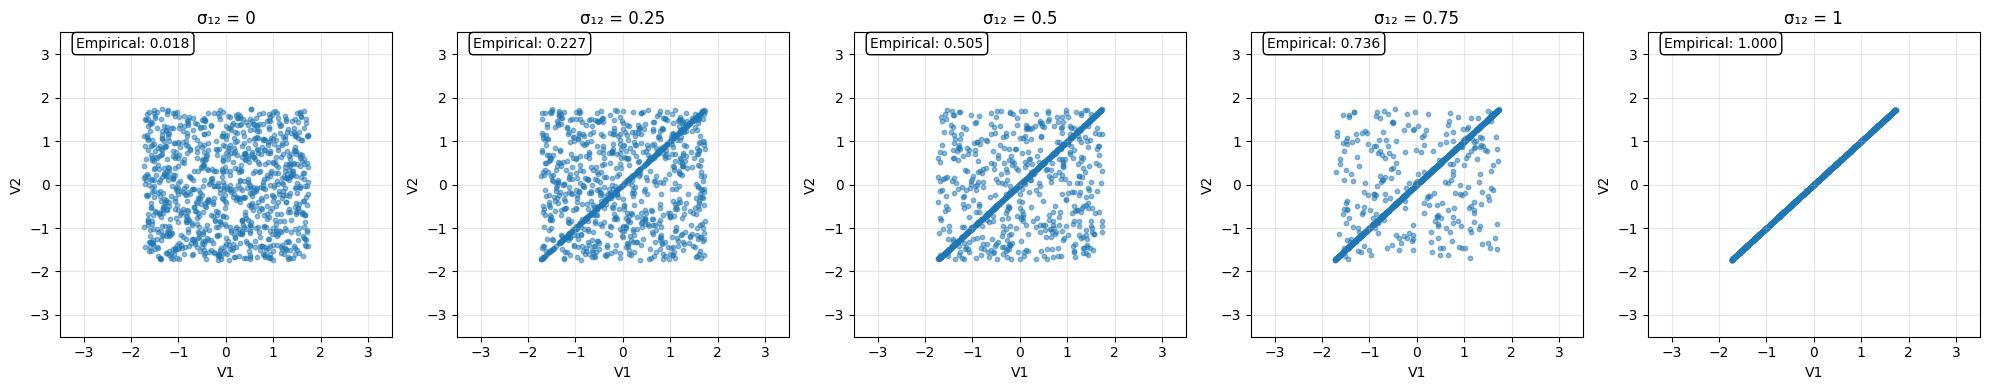

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_correlated_uniforms(sigma12, n_samples=1000):
    """
    Generate two correlated uniform random variables V1, V2
    with mean 0, variance 1, and covariance sigma12
    """
    # Calculate p from covariance relationship
    p = 1 - sigma12

    # Generate base uniform variables on [-sqrt(3), sqrt(3)]
    alpha = -np.sqrt(3)
    beta = np.sqrt(3)
    X1 = np.random.uniform(alpha, beta, n_samples)
    X2 = np.random.uniform(alpha, beta, n_samples)

    # Generate Bernoulli variables
    B = np.random.binomial(1, p, n_samples)

    # Construct V1 and V2
    V1 = X1
    V2 = (1 - B) * X1 + B * X2

    return V1, V2

# Generate samples for different correlation values
correlations = [0, 0.25, 0.5, 0.75, 1]
n_samples = 1000

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, sigma12 in enumerate(correlations):
    V1, V2 = generate_correlated_uniforms(sigma12, n_samples)

    # Plot scatter
    axes[i].scatter(V1, V2, alpha=0.5, s=10)
    axes[i].set_xlabel('V1')
    axes[i].set_ylabel('V2')
    axes[i].set_title(f'σ₁₂ = {sigma12}')
    axes[i].set_xlim(-3.5, 3.5)
    axes[i].set_ylim(-3.5, 3.5)
    axes[i].grid(True, alpha=0.3)

    # Calculate empirical correlation for verification
    emp_corr = np.corrcoef(V1, V2)[0, 1]
    axes[i].text(0.05, 0.95, f'Empirical: {emp_corr:.3f}',
                transform=axes[i].transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [ ]:
## Computing Joint Probability ℙ[V₁ ≤ 0, V₂ ≤ 0] for σ₁₂ = 0.5


def compute_joint_probability(sigma12=0.5, n_samples=1000000):
    """
    Compute P(V1 <= 0, V2 <= 0) for given covariance
    """
    V1, V2 = generate_correlated_uniforms(sigma12, n_samples)

    # Count how many samples satisfy both conditions
    joint_event = (V1 <= 0) & (V2 <= 0)
    prob = np.mean(joint_event)

    # Standard error for confidence interval
    se = np.sqrt(prob * (1 - prob) / n_samples)
    ci_lower = prob - 1.96 * se
    ci_upper = prob + 1.96 * se

    return prob, ci_lower, ci_upper

# Compute the probability
prob, ci_lower, ci_upper = compute_joint_probability(sigma12=0.5)

print(f"P(V1 <= 0, V2 <= 0) for σ₁₂ = 0.5: {prob:.6f}")
print(f"95% Confidence Interval: ({ci_lower:.6f}, {ci_upper:.6f})")

P(V1 <= 0, V2 <= 0) for σ₁₂ = 0.5: 0.375192
95% Confidence Interval: (0.374243, 0.376141)


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.
### Step 1: Argument that W₁, W₂ are uniform on [α,β]

Let $Z \sim N(0,1)$ be a standard normal random variable. Then:

- $\Phi(Z) \sim \text{Uniform}(0,1)$ by the probability integral transform
- Therefore, $W = \alpha + (\beta - \alpha)\Phi(Z) \sim \text{Uniform}(\alpha, \beta)$

Since $Z_1, Z_2$ are standard normal (after appropriate scaling), we have:
- $W_1 = \alpha + (\beta - \alpha)\Phi(Z_1) \sim \text{Uniform}(\alpha, \beta)$
- $W_2 = \alpha + (\beta - \alpha)\Phi(Z_2) \sim \text{Uniform}(\alpha, \beta)$

With $\alpha = -\sqrt{3}$, $\beta = \sqrt{3}$, we get:
- $\mathbb{E}[W_1] = \mathbb{E}[W_2] = 0$
- $\text{Var}(W_1) = \text{Var}(W_2) = 1$


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky
from scipy.stats import norm

In [ ]:
# Step 3: Gaussian copula function
def gaussian_copula_uniforms(sigma12, n_samples=1000):
    """
    Generate W1, W2 using Gaussian copula method
    """
    # Covariance matrix for bivariate normal
    Sigma = np.array([[1, sigma12],
                      [sigma12, 1]])

    # Cholesky decomposition
    L = cholesky(Sigma, lower=True)

    # Generate independent standard normals
    Z_ind = np.random.normal(0, 1, (2, n_samples))

    # Correlated normals
    Z_corr = L @ Z_ind

    # Convert to uniform using normal CDF
    alpha = -np.sqrt(3)
    beta = np.sqrt(3)

    W1 = alpha + (beta - alpha) * norm.cdf(Z_corr[0])
    W2 = alpha + (beta - alpha) * norm.cdf(Z_corr[1])

    return W1, W2

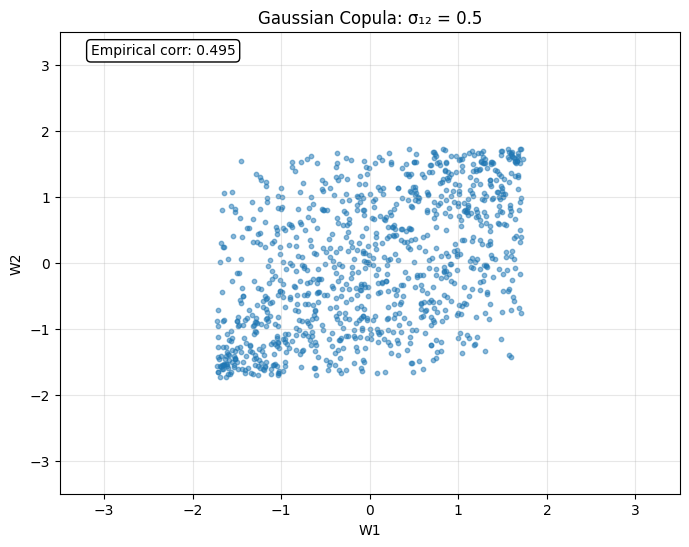

In [ ]:
# Step 4: Generate samples and create scatter plot
sigma12 = 0.5
W1, W2 = gaussian_copula_uniforms(sigma12, n_samples=1000)

plt.figure(figsize=(8, 6))
plt.scatter(W1, W2, alpha=0.5, s=10)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title(f'Gaussian Copula: σ₁₂ = {sigma12}')
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.grid(True, alpha=0.3)

# Calculate empirical correlation
emp_corr = np.corrcoef(W1, W2)[0, 1]
plt.text(0.05, 0.95, f'Empirical corr: {emp_corr:.3f}',
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.show()

In [ ]:
# Step 5: Function to compute joint positive probability
def compute_joint_positive_prob(sigma12=0.5, n_samples=1000000):
    """
    Compute P(W1 >= 0, W2 >= 0) using Gaussian copula method
    """
    W1, W2 = gaussian_copula_uniforms(sigma12, n_samples)

    # Count how many samples satisfy both conditions
    joint_positive = (W1 >= 0) & (W2 >= 0)
    prob = np.mean(joint_positive)

    # Standard error for confidence interval
    se = np.sqrt(prob * (1 - prob) / n_samples)
    ci_lower = prob - 1.96 * se
    ci_upper = prob + 1.96 * se

    return prob, ci_lower, ci_upper

In [ ]:
# Step 6: Compute the probability
prob, ci_lower, ci_upper = compute_joint_positive_prob(sigma12=0.5)

print(f"P(W1 >= 0, W2 >= 0) for σ₁₂ = 0.5: {prob:.6f}")
print(f"95% Confidence Interval: ({ci_lower:.6f}, {ci_upper:.6f})")

P(W1 >= 0, W2 >= 0) for σ₁₂ = 0.5: 0.333623
95% Confidence Interval: (0.332699, 0.334547)
